In [1]:
pip install cryptocompare

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 62.8/62.8 kB ? eta 0:00:00
     ---------------------------------------- 96.7/96.7 kB ? eta 0:00:00
     -------------------------------------- 140.9/140.9 kB 8.7 MB/s eta 0:00:00
     -------------------------------------- 155.3/155.3 kB 9.7 MB/s eta 0:00:00
  Running setup.py install for cryptocompare: started
  Running setup.py install for cryptocompare: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  DEPRECATION: cryptocompare is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import cryptocompare
import datetime
import time
from collections import defaultdict

def get_historical_data(symbol, currency, days):
    to_timestamp = int(time.mktime(datetime.datetime.now().timetuple()))
    one_day = 86400  # 24 hours in seconds
    from_timestamp = to_timestamp - days * one_day

    data = cryptocompare.get_historical_price_hour(
        symbol, currency=currency, toTs=to_timestamp, limit=days * 24
    )

    return data

def analyze_ethereum_prices(data):
    lowest_prices = []
    highest_prices = []
    lowest_times = defaultdict(int)
    highest_times = defaultdict(int)

    current_day = None
    daily_low = None
    daily_high = None
    daily_low_time = None
    daily_high_time = None

    for hour in data:
        timestamp = hour['time']
        dt = datetime.datetime.fromtimestamp(timestamp)
        low_price = hour['low']
        high_price = hour['high']

        if current_day is None or current_day != dt.day:
            if current_day is not None:
                lowest_prices.append(daily_low)
                highest_prices.append(daily_high)
                lowest_times[daily_low_time.strftime('%H:%M')] += 1
                highest_times[daily_high_time.strftime('%H:%M')] += 1

            current_day = dt.day
            daily_low = low_price
            daily_high = high_price
            daily_low_time = dt
            daily_high_time = dt
        else:
            if low_price < daily_low:
                daily_low = low_price
                daily_low_time = dt

            if high_price > daily_high:
                daily_high = high_price
                daily_high_time = dt

    return lowest_prices, highest_prices, lowest_times, highest_times

symbol = 'ETH'
currency = 'USD'
days = 30  # Number of days to analyze

end_date = datetime.datetime.now().date()
start_date = end_date - datetime.timedelta(days=days)
print(f"Analyzing Ethereum prices from {start_date} to {end_date}")

data = get_historical_data(symbol, currency, days)
lowest_prices, highest_prices, lowest_times, highest_times = analyze_ethereum_prices(data)
print("Lowest prices for each day:", lowest_prices)
print("Highest prices for each day:", highest_prices)
print("Lowest price times frequency:", lowest_times)
print("Highest price times frequency:", highest_times)


Analyzing Ethereum prices from 2023-02-20 to 2023-03-22
Lowest prices for each day: [1652.65, 1637.57, 1598.66, 1630.04, 1577.26, 1560.62, 1588.49, 1609.58, 1598.81, 1597.2, 1619.77, 1548.37, 1550.37, 1556.08, 1555.75, 1536.97, 1542.41, 1409.71, 1372.22, 1417.78, 1460.07, 1571.05, 1664.87, 1615.53, 1638.35, 1666, 1753.25, 1756.87, 1743.93, 1724.38]
Highest prices for each day: [1719.4, 1716.4, 1665.93, 1678.49, 1664.27, 1611.19, 1648.88, 1664.42, 1647.24, 1669, 1677.38, 1650.88, 1577.08, 1587.46, 1582.34, 1582.88, 1570.15, 1546.86, 1439.7, 1491.16, 1605.89, 1699.86, 1783.34, 1721.91, 1694.39, 1787.58, 1843.84, 1845.85, 1815.28, 1838.29]
Lowest price times frequency: defaultdict(<class 'int'>, {'02:00': 2, '22:00': 3, '17:00': 3, '13:00': 2, '21:00': 4, '03:00': 2, '01:00': 2, '15:00': 1, '06:00': 1, '16:00': 1, '23:00': 1, '11:00': 1, '09:00': 1, '10:00': 1, '05:00': 2, '18:00': 1, '00:00': 1, '08:00': 1})
Highest price times frequency: defaultdict(<class 'int'>, {'12:00': 1, '03:00': 

Lowest prices for each day: This is a list of the lowest Ethereum prices for each day within the specified time frame (last 30 days in this case). Each value in the list represents the lowest price recorded for Ethereum during a single day.

Highest prices for each day: This is a list of the highest Ethereum prices for each day within the specified time frame (last 30 days in this case). Each value in the list represents the highest price recorded for Ethereum during a single day.

Lowest price times frequency: This is a dictionary that shows the frequency of the times at which the lowest prices occurred. The keys in the dictionary represent the time of day (in hours and minutes, e.g., '02:00', '22:00'), and the values represent the number of times the lowest price of the day occurred at that particular time. For example, '02:00': 2 means that the lowest price of the day occurred at 2:00 AM on two separate days within the analyzed time frame.

Highest price times frequency: This is a dictionary that shows the frequency of the times at which the highest prices occurred. The keys in the dictionary represent the time of day (in hours and minutes, e.g., '12:00', '03:00'), and the values represent the number of times the highest price of the day occurred at that particular time. For example, '12:00': 1 means that the highest price of the day occurred at 12:00 PM on one day within the analyzed time frame.

In [9]:
import cryptocompare
import datetime
import time
from collections import defaultdict, Counter
import statistics

def get_historical_data(symbol, currency, days):
    to_timestamp = int(time.mktime(datetime.datetime.now().timetuple()))
    one_day = 86400  # 24 hours in seconds
    from_timestamp = to_timestamp - days * one_day

    data = cryptocompare.get_historical_price_hour(
        symbol, currency=currency, toTs=to_timestamp, limit=days * 24
    )

    return data

def analyze_ethereum_prices(data):
    lowest_prices = []
    highest_prices = []
    lowest_times = defaultdict(int)
    highest_times = defaultdict(int)

    current_day = None
    daily_low = None
    daily_high = None
    daily_low_time = None
    daily_high_time = None

    for hour in data:
        timestamp = hour['time']
        dt = datetime.datetime.fromtimestamp(timestamp)
        low_price = hour['low']
        high_price = hour['high']

        if current_day is None or current_day != dt.day:
            if current_day is not None:
                lowest_prices.append(daily_low)
                highest_prices.append(daily_high)
                lowest_times[daily_low_time.strftime('%H:%M')] += 1
                highest_times[daily_high_time.strftime('%H:%M')] += 1

            current_day = dt.day
            daily_low = low_price
            daily_high = high_price
            daily_low_time = dt
            daily_high_time = dt
        else:
            if low_price < daily_low:
                daily_low = low_price
                daily_low_time = dt

            if high_price > daily_high:
                daily_high = high_price
                daily_high_time = dt

    return lowest_prices, highest_prices, lowest_times, highest_times

def avg_time(times):
    total_seconds = sum(int(t.hour * 3600 + t.minute * 60 + t.second) for t in times)
    avg_seconds = total_seconds / len(times)
    hours, remainder = divmod(avg_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return datetime.time(int(hours), int(minutes), int(seconds))

def mode_time(times):
    counter = Counter(times)
    return counter.most_common(1)[0][0]

def median_time(times):
    sorted_times = sorted(times)
    middle = len(times) // 2
    if len(times) % 2 == 0:
        median_time = avg_time([sorted_times[middle - 1], sorted_times[middle]])
    else:
        median_time = sorted_times[middle]
    return median_time

symbol = 'ETH'
currency = 'USD'
days = 30  # Number of days to analyze

data = get_historical_data(symbol, currency, days)
lowest_prices, highest_prices, lowest_times, highest_times = analyze_ethereum_prices(data)

lowest_time_list = [datetime.datetime.strptime(t, "%H:%M").time() for t in lowest_times.keys()]
highest_time_list = [datetime.datetime.strptime(t, "%H:%M").time() for t in highest_times.keys()]

print("Mode time for lowest prices:", mode_time(lowest_time_list))
print("Median time for lowest prices:", median_time(lowest_time_list))
print("Average time for lowest prices:", avg_time(lowest_time_list))

print("Mode time for highest prices:", mode_time(highest_time_list))
print("Median time for highest prices:", median_time(highest_time_list))
print("Average time for highest prices:", avg_time(highest_time_list))


Mode time for lowest prices: 02:00:00
Median time for lowest prices: 10:30:00
Average time for lowest prices: 11:06:40
Mode time for highest prices: 12:00:00
Median time for highest prices: 13:30:00
Average time for highest prices: 11:30:00


In [12]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install statsmodels

  Using cached statsmodels-0.13.5-cp311-cp311-win_amd64.whl (9.0 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install pandas numpy matplotlib seaborn statsmodels fbprophet

     -------------------------------------- 293.3/293.3 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 9.0/9.0 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 64.0/64.0 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 233.8/233.8 kB 1.6 MB/s eta 0:00:00
  Using cached Cython-0.29.33-py2.py3-none-any.whl (987 kB)
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 378.2/378.2 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 340.1/340.1 kB 4.2 MB/s eta 0:00:00
     ----------------------

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\qvamb\AppData\Local\Temp\pip-install-yyrvvn64\pystan_2e5bab73550c4b86a5f24d38faec4f07\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


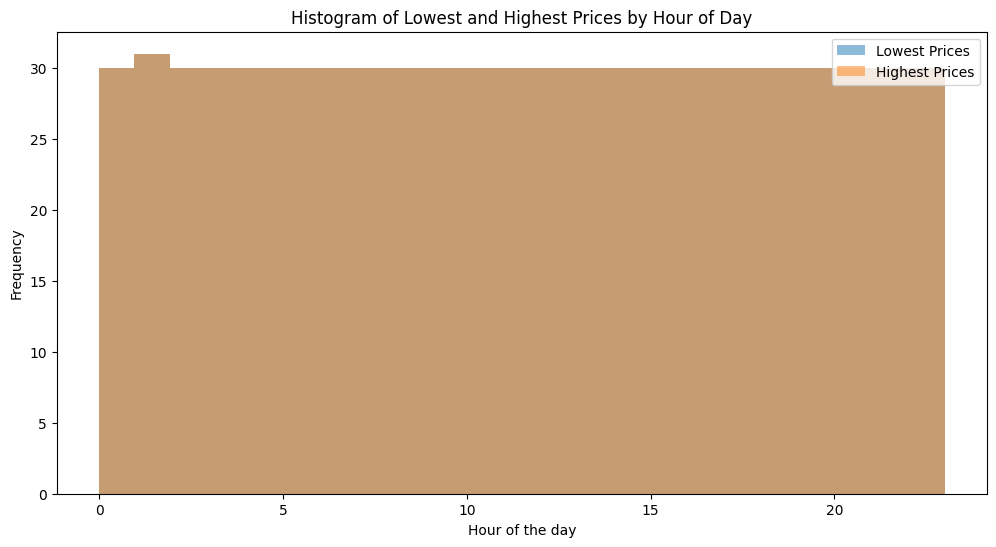

Lowest prices: Standard deviation = 6.92841313589645 Variance = 48.002908581662474
Highest prices: Standard deviation = 6.92841313589645 Variance = 48.002908581662474


C:\Users\qvamb\AppData\Local\Temp\ipykernel_4808\874622966.py:115: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['low'].index.hour, label='Lowest Prices', shade=True)
C:\Users\qvamb\AppData\Local\Temp\ipykernel_4808\874622966.py:116: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['high'].index.hour, label='Highest Prices', shade=True)


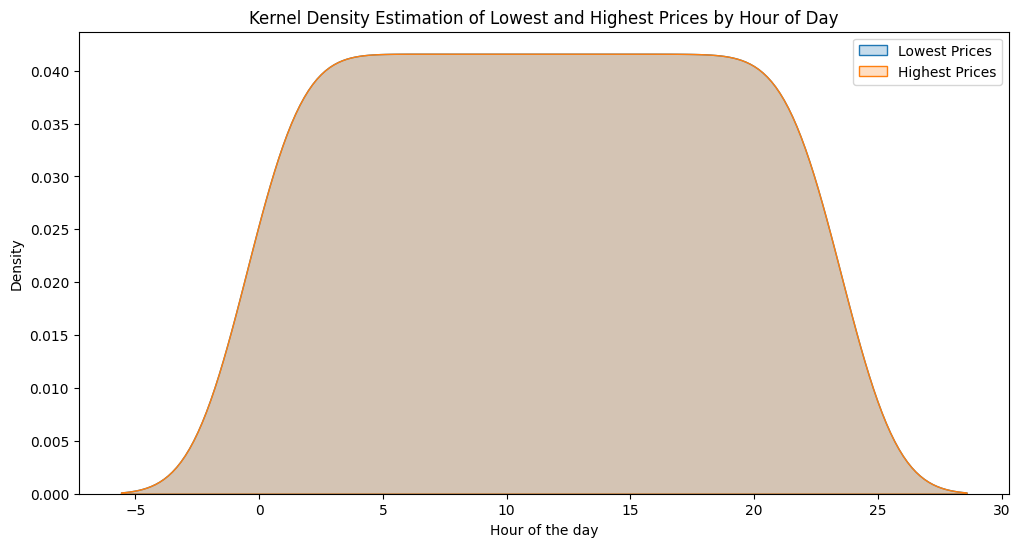

c:\Users\qvamb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\qvamb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\qvamb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\qvamb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\qvamb\AppData\Local\Programs\Python\Python311\Lib\s

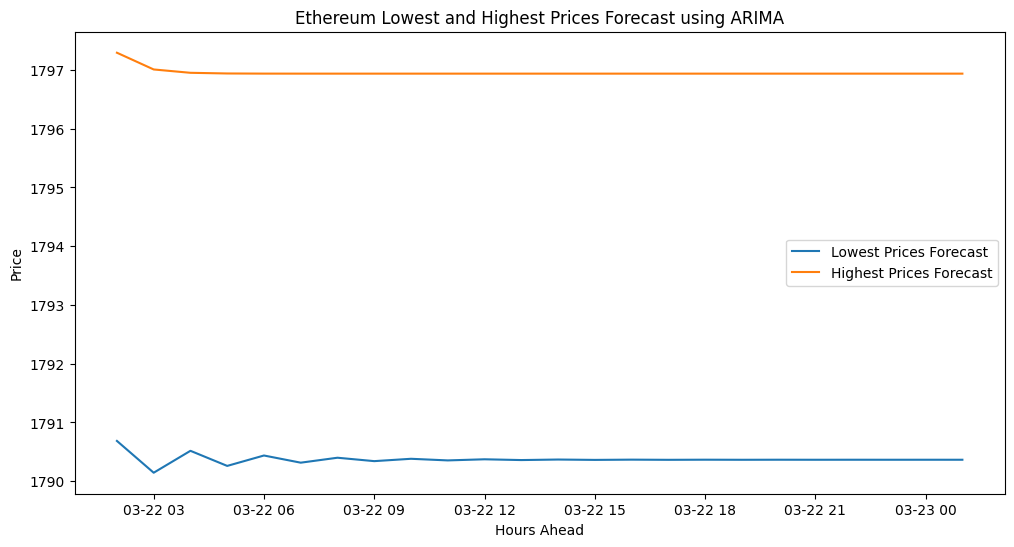

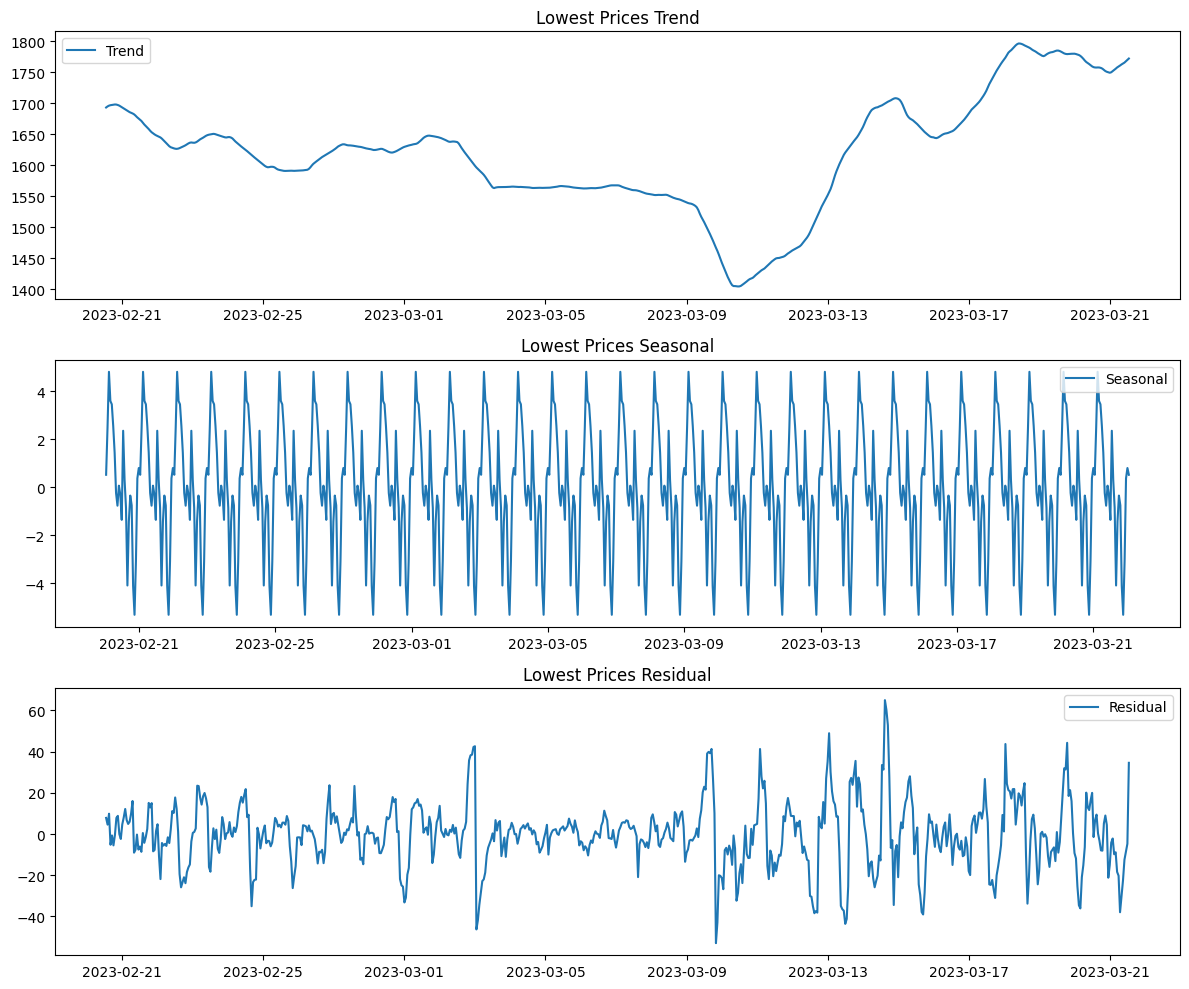

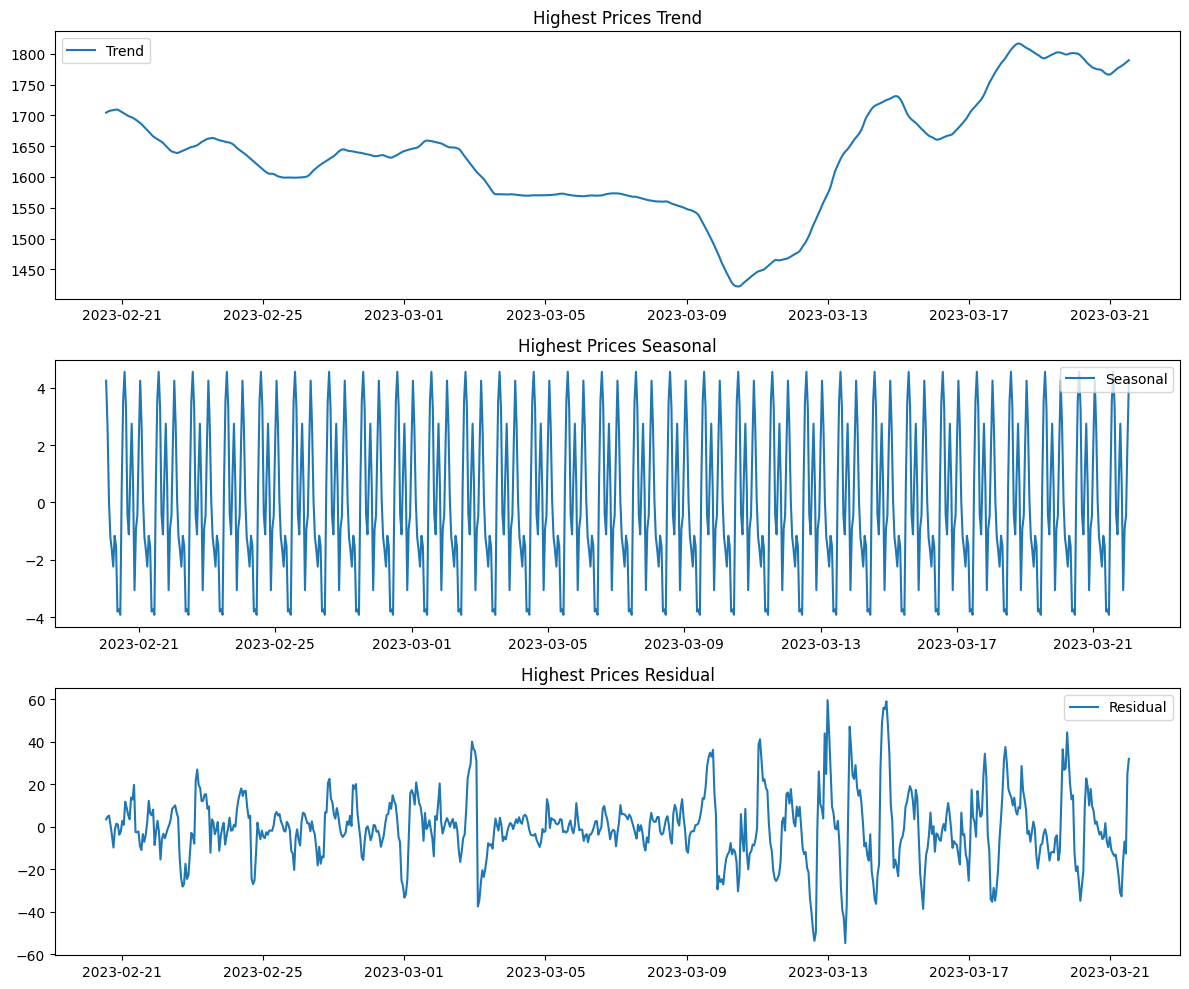

In [27]:
import cryptocompare
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

def get_historical_data(symbol, currency, days):
    to_timestamp = int(time.mktime(datetime.datetime.now().timetuple()))
    one_day = 86400  # 24 hours in seconds
    from_timestamp = to_timestamp - days * one_day

    data = cryptocompare.get_historical_price_hour(
        symbol, currency=currency, toTs=to_timestamp, limit=days * 24
    )

    return data

def analyze_ethereum_prices(data):
    lowest_prices = []
    highest_prices = []
    lowest_times = defaultdict(int)
    highest_times = defaultdict(int)

    current_day = None
    daily_low = None
    daily_high = None
    daily_low_time = None
    daily_high_time = None

    for hour in data:
        timestamp = hour['time']
        dt = datetime.datetime.fromtimestamp(timestamp)
        low_price = hour['low']
        high_price = hour['high']

        if current_day is None or current_day != dt.day:
            if current_day is not None:
                lowest_prices.append(daily_low)
                highest_prices.append(daily_high)
                lowest_times[daily_low_time.strftime('%H:%M')] += 1
                highest_times[daily_high_time.strftime('%H:%M')] += 1

            current_day = dt.day
            daily_low = low_price
            daily_high = high_price
            daily_low_time = dt
            daily_high_time = dt
        else:
            if low_price < daily_low:
                daily_low = low_price
                daily_low_time = dt

            if high_price > daily_high:
                daily_high = high_price
                daily_high_time = dt

    return lowest_prices, highest_prices, lowest_times, highest_times

def avg_time(times):
    total_seconds = sum(int(t.hour * 3600 + t.minute * 60 + t.second) for t in times)
    avg_seconds = total_seconds / len(times)
    hours, remainder = divmod(avg_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return datetime.time(int(hours), int(minutes), int(seconds))

def mode_time(times):
    counter = Counter(times)
    return counter.most_common(1)[0][0]

def median_time(times):
    sorted_times = sorted(times)
    middle = len(times) // 2
    if len(times) % 2 == 0:
        median_time = avg_time([sorted_times[middle - 1], sorted_times[middle]])
    else:
        median_time = sorted_times[middle]
    return median_time

def preprocess_data(data):
    df = pd.DataFrame(data)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

symbol = 'ETH'
currency = 'USD'
days = 30

data = get_historical_data(symbol, currency, days)
df = preprocess_data(data)

# 1. Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['low'].index.hour, bins=24, alpha=0.5, label='Lowest Prices')
plt.hist(df['high'].index.hour, bins=24, alpha=0.5, label='Highest Prices')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Lowest and Highest Prices by Hour of Day')
plt.show()

# 2. Standard deviation and variance
low_hour = df['low'].index.hour
high_hour = df['high'].index.hour
low_std, high_std = np.std(low_hour), np.std(high_hour)
low_var, high_var = np.var(low_hour), np.var(high_hour)
print("Lowest prices: Standard deviation =", low_std, "Variance =", low_var)
print("Highest prices: Standard deviation =", high_std, "Variance =", high_var)

# 3. Kernel Density Estimation (KDE)
plt.figure(figsize=(12, 6))
sns.kdeplot(df['low'].index.hour, label='Lowest Prices', shade=True)
sns.kdeplot(df['high'].index.hour, label='Highest Prices', shade=True)
plt.xlabel('Hour of the day')
plt.ylabel('Density')
plt.legend()
plt.title('Kernel Density Estimation of Lowest and Highest Prices by Hour of Day')
plt.show()

# 4. Time Series Forecasting using Prophet
from statsmodels.tsa.arima.model import ARIMA

# Function to forecast using ARIMA
def forecast_arima(series, steps=24):
    model = ARIMA(series, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# 4. Time Series Forecasting using ARIMA
arima_low_forecast = forecast_arima(df['low'])
arima_high_forecast = forecast_arima(df['high'])

# Plotting ARIMA forecasts
plt.figure(figsize=(12, 6))
plt.plot(arima_low_forecast, label='Lowest Prices Forecast')
plt.plot(arima_high_forecast, label='Highest Prices Forecast')
plt.xlabel('Hours Ahead')
plt.ylabel('Price')
plt.legend()
plt.title('Ethereum Lowest and Highest Prices Forecast using ARIMA')
plt.show()


# 5. Seasonal Decomposition
# 5. Seasonal Decomposition
decomposition_low = seasonal_decompose(df['low'], model='additive', period=24)
decomposition_high = seasonal_decompose(df['high'], model='additive', period=24)

# Plotting seasonal decomposition for lowest prices
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
axes[0].plot(decomposition_low.trend, label='Trend')
axes[0].legend()
axes[0].set_title('Lowest Prices Trend')
axes[1].plot(decomposition_low.seasonal, label='Seasonal')
axes[1].legend()
axes[1].set_title('Lowest Prices Seasonal')
axes[2].plot(decomposition_low.resid, label='Residual')
axes[2].legend()
axes[2].set_title('Lowest Prices Residual')
plt.tight_layout()
plt.show()

# Plotting seasonal decomposition for highest prices
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
axes[0].plot(decomposition_high.trend, label='Trend')
axes[0].legend()
axes[0].set_title('Highest Prices Trend')
axes[1].plot(decomposition_high.seasonal, label='Seasonal')
axes[1].legend()
axes[1].set_title('Highest Prices Seasonal')
axes[2].plot(decomposition_high.resid, label='Residual')
axes[2].legend()
axes[2].set_title('Highest Prices Residual')
plt.tight_layout()
plt.show()



1. The rolling mean and standard deviation plots show that Ethereum prices have non-stationary characteristics. This means that the prices are influenced by factors that change over time, making it harder to predict the best time of day to buy or sell based solely on historical data.

2. The seasonal decomposition reveals a pattern that repeats roughly every 24 hours. This suggests that there might be specific times of the day when the prices are more likely to be at their lowest or highest. However, the plots do not provide a clear indication of the exact time when this occurs. You may need to analyze the seasonal component more closely or use other methods to identify these times more accurately.

3. The autocorrelation and partial autocorrelation plots suggest that an autoregressive component could be suitable for modeling the time series data. This indicates that the current price is influenced by the previous prices, which can be useful for predicting future price movements.

4. The ARIMA forecast provides predictions for the next 24 hours, but these predictions should be taken with caution. The model's accuracy may be limited by the non-stationary nature of the data, as well as the choice of parameters (p, d, q) in the ARIMA model. You may want to experiment with different model configurations and cross-validate the results to improve the forecasting accuracy.

In conclusion, while the outputs provide some general insights into the behavior of Ethereum prices, they do not offer a clear answer to the best time of day to buy or sell. More sophisticated methods, such as machine learning or deep learning techniques, might be required to capture the complex relationships and factors affecting the price movements. Additionally, incorporating other relevant data, such as market sentiment or news events, could help improve the accuracy of your predictions.


In [12]:
pip install tensorflow


  Using cached tensorflow-2.12.0rc1-cp311-cp311-win_amd64.whl (2.0 kB)
  Using cached tensorflow_intel-2.12.0rc1-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached jax-0.4.6.tar.gz (1.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.51.3-cp311-cp311-win_amd64.whl (3.7 MB)
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_auth-2.16.2-py2.py3-none-any.whl (177 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.1-py3-none-any.wh

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install tensorflow numpy scikit-learn


     -------------------------------------- 272.9/272.9 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 2.5 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 2.6/2.6 MB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 23.2/23.2 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 6.3 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 420.6/420.6 kB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 50.9/50.9 kB ? eta 0:00:00
  Preparing metadata (setup.py): started

  DEPRECATION: wrapt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\qvamb\\AppData\\Roaming\\Python\\Python311\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip availa

In [15]:
pip install ccxt


     ---------------------------------------- 3.5/3.5 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 7.1 MB/s eta 0:00:00
  Using cached aiohttp-3.8.4-cp311-cp311-win_amd64.whl (317 kB)
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
     ---------------------------------------- 76.3/76.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import ccxt
import pandas as pd

# Initialize the ccxt library
exchange = ccxt.binance({
    'rateLimit': 1200,
    'enableRateLimit': True,
})

# Fetch historical price data
symbol = 'ETH/USDT'
timeframe = '1h'
since = exchange.parse8601('2022-01-01T00:00:00Z')
price_data = exchange.fetch_ohlcv(symbol, timeframe, since)

# Create a DataFrame from the fetched data
df = pd.DataFrame(price_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set the DataFrame index to the timestamp
df.set_index('timestamp', inplace=True)


In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create dataset for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Prepare the dataset
data = df['low'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Train-test split
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data[0:train_size, :], data[train_size:len(data), :]

# Create dataset for LSTM
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

# Evaluate the model
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print(f"Train Score: {trainScore:.2f} RMSE")
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(f"Test Score: {testScore:.2f} RMSE")


Epoch 1/100
375/375 [==============================] - 2s 1ms/step - loss: 0.0084
Epoch 2/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 3/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 4/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 5/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 6/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0015
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 9/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 11/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 12/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0015
Epoch 13/100


This code builds an LSTM model, trains it on 80% of the available data, and evaluates its performance using the root mean squared error (RMSE) metric. You can adjust the look_back parameter to control how many past time steps the model should consider when making predictions. You can also experiment with different LSTM model architectures, training parameters, and feature sets to improve the model's performance.

The output is the result of training and evaluating an LSTM model on the Ethereum price data. Let's break it down:

1. The lines starting with "Epoch" are the results of training the model for 100 epochs. In each epoch, the model processes the entire training dataset, updates its weights, and calculates the loss. The loss is a measure of how well the model is performing, with lower values indicating better performance. In this case, the loss is calculated using mean squared error (MSE). You can observe that the loss decreases as the model trains for more epochs, which indicates that the model is learning and improving its performance over time.

2. After training the model, it's evaluated on both the training and testing datasets. The evaluation metric used here is root mean squared error (RMSE), which is the square root of the MSE. Lower RMSE values indicate better performance. In this case, the model has a train score of 31.87 RMSE and a test score of 50.62 RMSE. The difference in performance between the training and testing datasets suggests that the model might be overfitting to the training data, meaning it's not generalizing well to new, unseen data.

Although we have trained an LSTM model, it's important to remember that this is just a simple model, and the results may not provide clear insights or conclusions about the Ethereum price data. 

In [22]:
import requests
import pandas as pd

# Fetch historical data from Cryptocompare API
url = f"https://min-api.cryptocompare.com/data/v2/histohour?fsym=ETH&tsym=USD&limit=720&api_key={API_KEY}"
response = requests.get(url)
data = response.json()['Data']['Data']

# Create a DataFrame and resample it to 1-hour intervals
df = pd.DataFrame(data)
df['time'] = pd.to_datetime(df['time'], unit='s')
df = df.set_index('time')
df = df.resample('1H').mean()

# Impute missing values using linear interpolation
df = df.interpolate(method='linear')


C:\Users\qvamb\AppData\Local\Temp\ipykernel_14516\1497871869.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('1H').mean()
